# Deep Learning ISD

## Sommaire:
* [1. Auteurs et liens](#1.-Auteurs-et-liens)
* [2. Introduction](#2.-Introduction)
* [3. Aspects Théoriques](#3.-Aspects-Théoriques)
* [4. Détails de l'implémentation](#4.-Détails-de-l'implémentation)
    * [4.1 Set de données](#4.1-Set-de-données)
    * [4.2 Modularité](#4.2-Modularité)
    * [4.3 LoadData](#4.3-LoadData)
    * [4.4 Functions](#4.4-Functions)
    * [4.5 Layers](#4.5-Layers)
    * [4.6 NeuralNetwork](#4.6-NeuralNetwork)
    * [4.7 Trainer](#4.7-Trainer)
    * [4.7 Utilities](#4.8-Utilities)
* [5. Démonstration](#5.-Démonstration)
    * [5.1 Entrainement et Test sur mini-batch](#5.1-Entrainement-et-Test-sur-mini\-batch)
    * [5.2 Entrainement sur mini-batch, Test sur tout le data-set](#5.2-Entrainement-sur-mini-batch,-Test-sur-tout-le-data\-set)
* [6. Exemple concret](#6.-Exemple-concret)
* [7. Applications](#7.-Applications)
* [8. Ouverture et extensions possibles](#8.-Ouverture-et-extensions-possibles)

## 1. Auteurs et liens

| Nom  | Prénom | Courriel | Groupe | Github |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
| AIT BELKACEM  | Moncef Karim  | moncef.ait-belkacem@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/MK8BK">MK8BK</a>|
| Tran--Guery | Thimoté | thimote.tran--guery@universite-paris-saclay.fr  | LDDIM2  |<a href="https://github.com/Thimote91">Thimote91</a>|

[Repositoire GitHub du projet](https://github.com/MK8BK/Deep_Learning_ISD)

## 2. Introduction
Ceci est le projet final de l'UE <a href="https://nicolas.thiery.name/Enseignement/IntroScienceDonnees/">Initiation à la Science des Données</a> offert en L1-S2 à l'Université Paris-Saclay.

Il s'agit d'un classificateur de caractères hexadécimaux manuscrits en python.

Plus précisément, c’est une implémentation d’un réseau neuronal, visant la prédiction de caractères manuscrits de `0-9/A-F` (16 classes),

dans le data set `EMNIST`.

On utilise pour cela le module de calcul numérique `numpy`, le module de visualisation `matplotlib` et le module de traitement d'image `PIL`.

(En outre des modules suivants de la librairie standard python : `os`, `random`, `pickle`, `typing`)

## 3. Aspects Théoriques 

draft, en cours de remplissage, manque contenu, phrase pas revisee, accents et fautes osef


**Intuition**

Soit une image monochrome de $ 28\times28 $  pixels (channel unique). 

On représente cette image comme un élément de l'ensemble $[0,1]^{28\times28}$, soit un 784-uplet de valeurs dans $[0,1]$. 

C'est un aplatissement de l'image sous forme de vecteur ligne (ou colonne). 

On effectue biensur une normalisation en divisant par 255, ce qui borne bien la valeur de chaque pixel entre 0 et 1.

L'image représente au plus un élément de l'ensemble des caractères hexadécimaux : 

$\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F\} =$ ***C***

On dit que ces 16 éléments sont les classes du problème.

On suppose qu'il existe une application $f: [0,1]^{784}\longrightarrow $ ***C***.

Un réseau neuronal est en fait une approximation de $f$ par composition de fonctions linéaires et non linéaires.

**Architecture d'un réseau de Deep Learning**

**Le neurone**

<img src="./docs/illustrations/neurone.png" width=400 style="float: right"/>

La structure principale à bien maitriser est le neurone.

Un neurone est une composition de fonctions linéaires et non linéaires.

Les fonctions linéaires ne sont rien d'autre que des combinaisons linéaires des entrées $x_i$, ainsi que l'addition d'un biais $b$.

Les coefficients $w_i$ sont appelés les poids du neurone. (Ce sont les coefficients de la combinaison linéaire). 

Le résultat de cette somme pondérée et addition est alors passé en paramètre à une fonction non linéaire dite d'activation.

Il est important que cette fonction d’activation ne soit pas linéaire.
<br>

**Détails**

Un neurone standard reçoit un vecteur colonne $\textbf{x}$ contenant $\textit{F}$ éléments (features), 

en fait la combinaison linéaire par produit scalaire avec un vecteur ligne de poids $\textbf{w}$, 

puis ajoute un scalaire appelé biais $b$.

La fonction d'activation $\sigma$ est appliquée au résultat.

$$\textbf{w} \cdot \textbf{x} + b = z \longrightarrow \sigma(z) = a$$

$$
     \begin{bmatrix}
         w_{1} & w_{2} & \cdots & w_{F}\\
     \end{bmatrix}
     \cdot
     \begin{bmatrix}
         x_{1}\\
         x_{2}\\ 
         \vdots\\ 
         x_{F} 
     \end{bmatrix}
     + b
      =
     z \longrightarrow \sigma(z)
     =
     a
    $$




<img src="./docs/illustrations/nn.png" width=500 style="float: left" />

**La couche de neurones**

Voici une architecture standard d'un réseau de Deep learning.

Chaque nœud du graphe est un neurone.

Chaque trait reliant deux neurones est un poids $w_i$.

À chaque neurone on associe un nombre : le biais $b$.

Un lot de neurones (disposés verticalement sur cette illustration) est appelé une couche. 

Notons que dans notre cas de figure, il est obligatoire que la dernière couche contienne 16 neurones.

Il est aussi requis que la zérotième (convention) en contienne 784, ce n'est pas une vraie couche de neurones.


**Le forward pass**

Le forward pass correspond a la composition successive des fonctions du modèle.

C'est une opération itérative qui agit de couche en couche.

Soit la $k^{ieme}$ couche du réseau contenant $N$ neurones.

Chaque neurone de cette couche reçoit le vecteur colonne $\textbf{x}$.

Chaque élément de $\textbf{x}$ est en fait le résultat d'un neurone de la couche précédente.

En particulier, $\textbf{x}$ contient $F$ éléments, $F$ étant le nombre de neurones dans la $(k-1)^{ieme}$ couche.

Des que la $k^{ieme}$ couche est évaluée, 

Les résultats des N neurones sont mis dans un vecteur colonne $A$ qui sera alors l'entrée de la $(k+1)^{ieme}$ couche:

$$
A
=
\begin{bmatrix}
      a_{1}\\
      a_{2}\\ 
      \vdots\\ 
      a_{N} 
\end{bmatrix}
$$



Une fois la partie lineaire de la derniere couche evaluee, on dispose d'un vecteur colonne de 16 elements (1 par neurone).

Il est courant de transformer ce vecteur colonne de 16 valeurs en vecteur de probabilite ( somme = 1 ).

A cet effet, on utilise la fonction $softmax(x)$ comme fonction d'activation de la derniere couche.



$$
    z = 
    \begin{bmatrix}
        z_{1}\\
        z_{2}\\ 
        \vdots\\ 
        z_{16} 
    \end{bmatrix}
    \longrightarrow softmax(z)
     =
    \begin{bmatrix}
        e^{z_{1}} \over \sum{e^{z_i}}\\
        e^{z_{2}} \over \sum{e^{z_i}}\\
        \vdots\\ 
        e^{z_{16}} \over \sum{e^{z_i}}\\
    \end{bmatrix}
    = P_{redictions}
    $$



Le neurone ayant la plus grande probabilite est la prediction du modele. (les neurones etant classe de haut en bas, suivant l'ordre predefini des classes).

C'est la fin du forward pass.

**Les fonctions de perte**

Supposons que l'on connaisse la vraie classe d'une image.

On encode cette vraie classe sous forme de vecteur colonne contenant 16 elements.

$$
Y =     \begin{bmatrix}
        y_{1} = 0\\
        y_{2} = 0\\ 
        \vdots\\
        y_{i} = 1\\ 
        \vdots\\ 
        z_{16} = 0
    \end{bmatrix}
$$

$i$ est la classe de cette image.

Exemple: si l'image contient un $B$ alors:

$$
Y =     \begin{bmatrix}
        y_{1} = 0\\
        y_{2} = 0\\ 
        \vdots\\
        y_{11} = 1\\ 
        \vdots\\ 
        z_{16} = 0
    \end{bmatrix}
$$

On parle de *One-hot encoding*.

On peut alors calculer l'erreur (perte, loss) a l'aide d'une fonction d'erreur operant sur les vecteurs $P$ et $Y$

Il est recomandee de choisir une fonction de perte convexe.

*Mean squared error*

$$MSE(P, Y) = \sum_{i=1}^{16} (Y_i - P_i)^2$$

*Categorical Cross entropy loss*

$$CCE(P, Y) = \sum_{i=1}^{16} Y_i\times ln(P_i) + (1 - Y_i)\times ln(1-P_i)$$

A noter que $CCE$ agit uniquement sur des vecteurs de probabilite. 

On choisit cette fonction du fait de la forte discrimination des mauvaises predictions (+$\infty$ aux bornes)

<img src="./docs/illustrations/CCE.png" />

Le forward pass est a effectuer lors des predictions mais aussi lors des entrainements.

L'entrainement sur une image est une operation en trois etapes: 

- La prediction: c'est l'evaluation successive des couches du modele suivi de la fonction d'activation softmax pour la derniere couche.
- Le cacul de l'erreur etant donne la classe de l'image (label)
- l'ajustement des parametres (backward pass)






**Le backward pass**

L'ajustement des parametres se fait de couche en couche. 

L'intuition principale est la recherche du minimum globale de la fonction de perte.

(d'ou l'importance de la convexite de la fonction de perte)

<img src="./docs/illustrations/sgd.png" />

On utilise la descente gradient (stochastique). 

Il s'agit d'une methode similaire a la methode de newton pour la recherche de racines. 

Pour un parametre $\theta$ ($w$ ou $b$) du modele, on calcule $\partial E \over \partial \theta$ : la derivee partielle de l'erreur $E$ par rapport a $\theta$.

On ajuste alors $\theta$ de la maniere suivante:

$$\theta \longleftarrow \theta - \alpha \times \frac{\partial E}{\partial \theta}$$

Ici $\alpha$ est un scalaire appelle taux d'apprentissage (learning rate). Il s'agit d'un hyperparametre controlant la magnitude de l'ajustement des parametres.

Biensur l'illustration ci dessus est un cas simple: il n'y a que deux parametres. Notre modele en contient bien plus.

**Details du calcul de derivees partielles**

Soit un neurone dans la $k^{ieme}$ couche. L'ajustement des parametres se fait en sens inverse. 

Le neurone recoit $\frac{\partial E}{\partial a} = \frac{\partial E}{\partial \sigma(z)}$

On sait que $a =\sigma(z) = \sigma(wx+b)$

Par la regle de la chaine:

$$ \frac{\partial E}{\partial z} = \frac{\partial E}{\partial \sigma(z)}\times\frac{\partial \sigma(z)}{\partial z} = \frac{\partial E}{\partial a} \times \sigma'(z)
$$

$$
\frac{\partial E}{\partial w} = \frac{\partial E}{\partial z} \times \frac{\partial z}{\partial w} = \frac{\partial E}{\partial z} \times x
$$

$$
\frac{\partial E}{\partial b} = \frac{\partial E}{\partial z} \times \frac{\partial z}{\partial b} = \frac{\partial E}{\partial z} \times 1
$$

$$
\frac{\partial E}{\partial x} = \frac{\partial E}{\partial z} \times \frac{\partial z}{\partial x} = \frac{\partial E}{\partial z} \times w
$$

Les parametres $w$ et $b$ sont ajustees

$$w \longleftarrow w - \alpha \frac{\partial E}{\partial w}$$

$$b\longleftarrow b - \alpha \frac{\partial E}{\partial b}$$

La valeur $\frac{\partial E}{\partial x}$ est envoyee vers la couche anterieure. 

Ce sera $\frac{\partial E}{\partial a}$ pour cette couche anterieure. 

L'operation perdure jusqu'a ajustement de tous les parametres $w$ et $b$ du modele.

**La descente gradient stochastique**

Le danger de la descente gradient sur une image a la fois est l'eloignement du minimum globale.

On pourrait biensur entrainer notre modele directement sur les 38400 images, mais ce n'est pas la solution la plus efficace.

Un compromis est d'utiliser un nombre reduit d'image (un batch/mini-batch). On parle alors de descente gradient stochastique.

Afin d'entrainer notre modele sur plusieurs images a la fois, on introduit le concept de vectorisation.

A lieu de penser a chaque neurone individuellement, on pense a chaque couche.

**La vectorisation**

Toutes les operations decrites ulterieurement seraient bien encombrantes a implementer avec des boucle.

Heureusement, elles peuvent presque toutes etre exprimee comme des operations matricielles.

Non seulement ca facilite l'implementation, mais ca ameliore la performace.


Une couche de neurones contenant $N$ neurones est composee de deux elements:

- une matrice de poids $W$ de dimensions $N$x$F$ (F les nombre de neurones dans la couche anterieure)
  
  chaque ligne de cette matrice contient les poids d'un neurone

$$ W=
     \begin{bmatrix}
         w_{11} & w_{12} & \cdots & w_{1F}\\
         w_{21} & w_{22} & \cdots & w_{2F}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         w_{N1} & w_{N2} & \cdots & w_{NF} 
     \end{bmatrix}
$$

//keep for later use of latex notation

\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}



$$
     \begin{bmatrix}
         a_{11} & a_{12} & \cdots & a_{1n}\\
         a_{21} & a_{22} & \cdots & a_{2n}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         a_{m1} & a_{m2} & \cdots & a_{mn} 
     \end{bmatrix}
     \times
     \begin{bmatrix}
         b_{11} & b_{12} & \cdots & b_{1p}\\
         b_{21} & b_{22} & \cdots & b_{2p}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         b_{n1} & b_{n2} & \cdots & b_{np} 
     \end{bmatrix}
      =
     \begin{bmatrix}
         c_{11} & c_{12} & \cdots & c_{1p}\\
         c_{21} & c_{22} & \cdots & c_{2p}\\ 
         \vdots & \vdots & \ddots & \vdots\\ 
         c_{m1} & c_{m2} & \cdots & c_{mp} 
     \end{bmatrix}
  $$
  $$ c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} + b_{nj} = \sum_{k=1}^n a_{ik}b_{kj} $$

Points utiles

**Hyper parametres**

**Fonctions d'activation**

Toute fonction non linéaire peut être utilisée comme fonction d'activation.

Toutefois certaines sont à favoriser.

Il est recommandé de choisir une fonction injective et/ou bornée, à dérivée bornée.

Les exemples les plus courants sont :

- $ReLu(x) = max(0, x)$
    - avantages : 
        - calculs simples, temps d'entrainement réduit
        - dérivée : 0 ou 1
    - inconvénients: 
        - non bornée
        - non injective (mais bon 0)

<img src="./docs/illustrations/relu.png" width=300px/>

- $Sigmoid(x) = \frac{1}{1+e^{-x}}$
    - avantages: 
        - injective
        - bornée
        - dérivée bornée
    - inconvénients: 
        - dérivée bornée   ] 0, 0.25 ]  (magnitude trop basse)
        - dérivée quasi nulle en $ \pm \infty$

<img src="./docs/illustrations/sigmoid.png" width=300px/>

- $Tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
    - avantages : 
        - injective
        - bornée 
        - dérivée bornée 
        - bonne magnitude de dérivée ] 0, 1 ] 
    - inconvénients: 
        - dérivée quasi nulle en $ \pm \infty$

<img src="./docs/illustrations/tanh.png" width=300px/>


**Activations implémentées :**

[comment]: <> (style="float: left")

**Initialisation glorot**

A la premiere iteration, les poids $w_i$ de chaque neurones sont initialisees aleatoirement entre -1 et 1 (pas de 0).

Il y'a toutefois un probleme de magnitude. Si la couche contient N neurones et recoit F entrees (neurones dans la couche anterieure)

**learning rate decay**

//a traiter

**Nombre de couches et overfitting**

//a traiter

## 4. Détails de l'implémentation 

L'outil principal à notre disposition est l'objet np.array du module `numpy` .

Toute référence au mot matrice est en fait un 2d np.array (np.matrix ne se prête pas à la tâche) .


### 4.1 Set de données

On dispose de `38400` images, reparties en `16` classes, soit `2400` images par classe.

Chaque image est au format `jpeg`.

Ces fichiers sont dans le dossier `./EMNIST_DATA_SET/{classe de l'image}/{nom de l'image}.jpeg`.

De plus chaque image contient sa classe en premier caractère.


<img src="./EMNIST_DATA_SET/0/0_char_102479.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/1/1_char_16442.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/2/2_char_7136.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/3/3_char_55992.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/4/4_char_80661.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/5/5_char_73026.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/6/6_char_19045.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/7/7_char_107973.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/8/8_char_22810.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/9/9_char_110343.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/A/A_char_4502.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/B/B_char_9251.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/C/C_char_15156.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/D/D_char_35808.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/E/E_char_712.jpeg"  width=56 style="float: left"/>
<img src="./EMNIST_DATA_SET/F/F_char_99118.jpeg" width=56 style="float: left"/>
<div style="clear: both"></div>

Par exemple : `./EMNIST_DATA_SET/0/0_char_102479.jpeg` est le path vers la première image (celle du 0)

### 4.2 Modularité

Notre implémentation de Deep Learning se décompose en 6 fichiers situes dans le dossier `./src/` :
 - `LoadData.py`
 - `Functions.py`
 - `Layers.py`
 - `NeuralNetwork.py`
 - `Trainer.py`
 - `Utilities.py`

Importons ces six fichiers :

In [1]:
from src.LoadData import *
from src.Functions import *
from src.Layers import *
from src.NeuralNetwork import *
from src.Trainer import *
from src.Utilities import *

Utilisons la fonction `show_source()` définie dans `./src/Utilities.py` afin d'observer en détails les objets qui seront manipulés par la suite.

### 4.3 `LoadData`

In [2]:
#Global list[str] of classes(single characters)
print(CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']


In [3]:
help(char_to_label)

Help on function char_to_label in module src.LoadData:

char_to_label(character: str) -> int
    Convert the character representation of the class into its integer representation
    @param: character: str , has to be in the global defined classes
    @return: the integer representation of said character



In [4]:
help(label_to_char)

Help on function label_to_char in module src.LoadData:

label_to_char(label: int) -> str
    Convert the integer representation of the class into its character representation
    @param: label: int , has to be a valid index of the global defined classes
    @return: the character representation of said integer



In [5]:
help(load_pil_image)

Help on function load_pil_image in module src.LoadData:

load_pil_image(str_path: str) -> <module 'PIL.Image' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\PIL\\Image.py'>
    Returns a grayscale PIL image given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a PIL Image object (single channel: grayscale)



In [6]:
help(load_numpy_image)

Help on function load_numpy_image in module src.LoadData:

load_numpy_image(str_path: str) -> <built-in function array>
    Returns the flattened numpy representation of an image 
                        given the full relative str_path
    @param: str_path: the full relative str_path to the image file
    @return: im: a normalized np.array of dimensions (h*w,1)



In [7]:
help(make_input_matrix)

Help on function make_input_matrix in module src.LoadData:

make_input_matrix(samples: list) -> <built-in function array>
    Returns the matrix representation of s samples
    @param: samples: a list of flattened np.array 's, 
                    each representing a sample image
    @return: input_matrix: a matrix (2d np.array) containing one sample per column,
                                     1 feature(pixel value) per row



In [8]:
help(make_labels)

Help on function make_labels in module src.LoadData:

make_labels(filenames: list) -> <built-in function array>
    Returns the class label for each image filename in filenames
    @param: filenames: a list of strings, relative str_paths to files
    @return: labels: a list of int labels : the class of each file



In [9]:
help(make_labels_matrix)

Help on function make_labels_matrix in module src.LoadData:

make_labels_matrix(labels: list, classes: list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']) -> <built-in function array>
    Returns the one hot encoded matrix representation of the labels, 
                        given a list of char labels
    @param: labels: a list of strings, filepaths
    @return: labels_matrix: a 2 np.array of 16 rows, each column is an image



In [10]:
help(make_random_batch)

Help on function make_random_batch in module src.LoadData:

make_random_batch(path: str, batch_size: int, classes: list, equilibrium: bool = True) -> list
    Returns a list of filenames randomly, equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: a list of strings, 
            the paths to the randomly selected images



In [11]:
help(load_training_set)

Help on function load_training_set in module src.LoadData:

load_training_set(path_str: str, batch_size: int, classes: list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F'], equilibrium: bool = True) -> tuple
    Returns a training input and labels matrices randomly, 
                                    equal per class or not
    @param: path: the path to the data_set folder
    @param: batch_size: the number of images in the batch
    @param: classes: a list of str representations of the classes
    @param: equilibrium: a bool, wether or not to equalize images per class
    @return: batch: X: an input matrix of shape (784,batch_size) 
                    Y: a corresponding labels matrix of shape (16, batch_size)



In [12]:
help(load_prediction_image)

Help on function load_prediction_image in module src.LoadData:

load_prediction_image(path_str: str)
    Loads a single image located at path_str
    @param: path_str: relative path to the image
    @return: x: a 784x1 input matrix
             im: PIL representation of the image



In [13]:
help(load_data_set)

Help on function load_data_set in module src.LoadData:

load_data_set(path_str)
    Loads entire data set at path_str
    @param: path_str: root path of data_set
    @return: X: an imput matrix of shape (784, 38400)
             Y: a labels matrix of shape (16, 38400)



### 4.4 `Functions`

In [14]:
help(Activation)

Help on class Activation in module src.Functions:

class Activation(builtins.object)
 |  Activation(fn, dfn)
 |  
 |  Abstract Activation function class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn, dfn)
 |      @param: Callable self.fn: forward pass function
 |      @param: Callable self.dfn: backward pass function
 |              (derivative of forward pass function)
 |  
 |  backward(self, x)
 |      apply backward pass function to input gradient matrix(2d np.array)
 |      @param: x : 2d np.array , gradient of loss wrt layer output
 |      @return: a 2d np.array (same shape as x), elementwise evaluation using dfn
 |              ie: gradient of error wrt linear part of layer
 |  
 |  forward(self, x)
 |      apply forward pass function to input matrix (2d np.array)
 |      @param: x : a 2d np.array, the results of the linear part of the layer
 |      @return: a 2d np.array (same shape as x), elementwise evaluation using fn
 |  
 |  -------------------------------------

In [15]:
help(SoftmaxCrossEntropyLoss)

Help on class SoftmaxCrossEntropyLoss in module src.Functions:

class SoftmaxCrossEntropyLoss(builtins.object)
 |  SoftmaxCrossEntropyLoss(eps: float = 1e-09, axis=0)
 |  
 |  Softmax Cross Entropy loss function wrapper class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eps: float = 1e-09, axis=0)
 |      @param: optional eps = 1e-9: safety pre-log clipping precision
 |      @param: optional axis = 0 (columns) 
 |                          apply softmax by columns or rows of matrix
 |  
 |  backward(self, y)
 |      return gradient of loss with respect to prediction 
 |          for Softmax Cross Entropy Loss function
 |      @param: y : 2d np.array of labels
 |      @return: softmax_preds - labels 
 |              (gradient of loss wrt linear output layer)
 |  
 |  forward(self, x)
 |      apply softmax to matrix by axis (0 columns; 1 rows)
 |      @param: x : a 2d np.array, the results of the linear part of the layer
 |      @return: self.p (cached for backward use), axis-wi

In [16]:
help(compute_cost)

Help on function compute_cost in module src.Functions:

compute_cost(p, y, eps=1e-09)
    Compute cost using Cross Entropy loss function
    @param: p : np.array of shape (16, batch_size),
             column wise probabilities per sample
    @param: y : one hot encoded np.array of labels
    @return: loss (float)



In [17]:
help(predicted_labels)

Help on function predicted_labels in module src.Functions:

predicted_labels(p)
    Converts a columnwise matrix of probabilities into prediction labels
    @param: p : np.array of shape (16, batch_size), sum(column)=1
    @return: a list characters, predictions based on max probability per image



In [18]:
help(percent_good)

Help on function percent_good in module src.Functions:

percent_good(p, y)
    Returns a percentage (range 0 to 100 float) of good predictions
    @param: p : np.array of shape (16, batch_size), sum(column)=1
    @param: y : np.array of shape (16, batch_size), one-hot-encoded
    @return: accuracy : a float between 0 and 100,
            the percentage of good predictions



### 4.5 `Layers`

In [19]:
help(DenseLinearLayer)

Help on class DenseLinearLayer in module src.Layers:

class DenseLinearLayer(builtins.object)
 |  DenseLinearLayer(N, F)
 |  
 |  DenseLinearLayer wrapper class
 |      Fully connected, unactivated layer
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F)
 |      Constructor uses glorot initialisation
 |      @param: N : int, number of neurons
 |      @param: F : int, number of input features 
 |                  (neurons in previous layer)
 |  
 |  backward(self, dZ, lr)
 |      Performs the backward pass given gradient matrix
 |      @param: dZ : an np.array of shape (N, batch_size)
 |      @action: updates self.W and self.B using SGD
 |      @return: dX : gradient of error wrt previous layer
 |              shape (F, batch_size)
 |  
 |  forward(self, X)
 |      Performs WX+B given input matrix
 |      @param: X : an np.array of shape (F, batch_size)
 |      @return: Z (cached for backward pass), weights*inputs + biases
 |  
 |  ---------------------------------------------

In [20]:
help(DenseActivatedLayer)

Help on class DenseActivatedLayer in module src.Layers:

class DenseActivatedLayer(DenseLinearLayer)
 |  DenseActivatedLayer(N, F, A)
 |  
 |  Child of DenseLinearLayer, uses an activation function (R->R)
 |  
 |  Method resolution order:
 |      DenseActivatedLayer
 |      DenseLinearLayer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F, A)
 |      Constructor, uses DenseLinearLayer constructor
 |          declares A, activation function for layer instance
 |      @param: N : int, number of neurons
 |      @param: F : int, number of input features 
 |                  (neurons in previous layer)
 |      @param: A : activation function, 
 |                  instance of src.Functions.Activation
 |  
 |  backward(self, dA_of_Z: <built-in function array>, lr) -> <built-in function array>
 |      Performs the backward pass given gradient matrix
 |      @param: dA_of_Z : an np.array of shape (N, batch_size)
 |      @action: elementwise activation.backward

In [21]:
help(OutputLayer)

Help on class OutputLayer in module src.Layers:

class OutputLayer(DenseLinearLayer)
 |  OutputLayer(N, F, C)
 |  
 |  Method resolution order:
 |      OutputLayer
 |      DenseLinearLayer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, N, F, C)
 |      Constructor, uses DenseLinearLayer constructor
 |          declares C, combined cost and activation function for layer
 |      @param: N : int, number of neurons (same as number of classes)
 |      @param: F : int, number of input features
 |                  (neurons in previous layer)
 |      @param: C : cost and activation function, 
 |                  Only implemented SoftmaxCrossEntropy for now (works best)
 |  
 |  backward(self, Y, lr)
 |      Performs the backward pass given labels matrix
 |      @param: Y : an np.array of shape (N, batch_size)
 |      @action: loss/cost function.backward(Y)
 |      @action: updates self.W and self.B using super().backward(dZ)
 |      @return: dX : gradient of err

### 4.6 `NeuralNetwork`

In [22]:
help(NeuralNetwork)

Help on class NeuralNetwork in module src.NeuralNetwork:

class NeuralNetwork(builtins.object)
 |  NeuralNetwork(layers)
 |  
 |  The NeuralNetwork wrapper class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, layers)
 |      @param: layers : list[DenseLinearLayer]
 |          ordered, last must be OutputLayer
 |  
 |  backward(self, Y, lr=0.01)
 |      Backward pass of neural network
 |      @param: Y : a 2d np.array of shape (16, batch_size)
 |      @param: Optional lr=0.01 : Learning rate
 |      @action: perform backpropagation, use ____Layer.backward
 |              successively
 |      @return: None
 |  
 |  forward(self, X)
 |      Forward pass of neural network
 |      @param: X : a 2d np.array of shape (784, batch_size)
 |      @return: res : model prediction: of shape (16, batch_size)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)

### 4.7 `Trainer`

In [23]:
help(train_on_subset)

Help on function train_on_subset in module src.Trainer:

train_on_subset(net, path_str, epochs, batch_size, equilibrium=False, lr=0.01, test_on_all=False, iter_test=20)
    The main training funtion
    @param: net : a NeuralNetwork object from src.NeuralNetwork
    @param: path_str : a string path to the data set folder
    @param: epochs : the number of training iterations
    @param: batch_size : the number of images per training
    @param: equilibrium : optional bool=False : divide batch_size equally per class
    @param: lr : optional float=0.01 : learning rate
    @param: test_on_all : optional bool=False : test on whole data set (38400)
    @param: iter_test : optional int=20 : test every iter_test iterations, print
    @return: accuracies: list[float] : ordered percentages of testing (float 0-100.)
    @return: costs : list[float] : ordered costs of testing 
            len(accuracies)=len(costs)+1 (accuracies initialised with 0)



### 4.8 `Utilities`

In [24]:
help(image_grid)

Help on function image_grid in module src.Utilities:

image_grid(images: Iterable[PIL.Image.Image], columns: int = 5, titles: Optional[Iterable] = None) -> matplotlib.figure.Figure
    Return a figure holding the images arranged in a grid
    
    Optionally the number of columns and/or image titles can be provided.
    
    Example:
    
         >>> image_grid(images)
         >>> image_grid(images, titles=[....])



## 5. Démonstration


In [25]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
plt.rcParams["figure.figsize"] = (20,10)
epochs = 1201

### 5.1 Entrainement et Test sur mini-batch

In [26]:
SCE = SoftmaxCrossEntropyLoss()
layers = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE)]
nn = NeuralNetwork(layers)

In [27]:
%%time
accuracies1, costs1 = train_on_subset(nn, "./EMNIST_DATA_SET/",
                                      epochs=epochs, batch_size=64, equilibrium=True,
                                      lr=1, test_on_all=False, iter_test=20)

Iteration:    0 | Accuracy: 7.8125 %
Iteration:   20 | Accuracy: 56.25 %
Iteration:   40 | Accuracy: 65.625 %
Iteration:   60 | Accuracy: 82.8125 %
Iteration:   80 | Accuracy: 75.0 %
Iteration:  100 | Accuracy: 75.0 %
Iteration:  120 | Accuracy: 81.25 %
Iteration:  140 | Accuracy: 84.375 %
Iteration:  160 | Accuracy: 73.4375 %
Iteration:  180 | Accuracy: 84.375 %
Iteration:  200 | Accuracy: 85.9375 %
Iteration:  220 | Accuracy: 78.125 %
Iteration:  240 | Accuracy: 93.75 %
Iteration:  260 | Accuracy: 85.9375 %
Iteration:  280 | Accuracy: 92.1875 %
Iteration:  300 | Accuracy: 93.75 %
Iteration:  320 | Accuracy: 90.625 %
Iteration:  340 | Accuracy: 87.5 %
Iteration:  360 | Accuracy: 90.625 %
Iteration:  380 | Accuracy: 87.5 %
Iteration:  400 | Accuracy: 89.0625 %
Iteration:  420 | Accuracy: 87.5 %
Iteration:  440 | Accuracy: 93.75 %
Iteration:  460 | Accuracy: 96.875 %
Iteration:  480 | Accuracy: 95.3125 %
Iteration:  500 | Accuracy: 96.875 %
Iteration:  520 | Accuracy: 90.625 %
Iteration

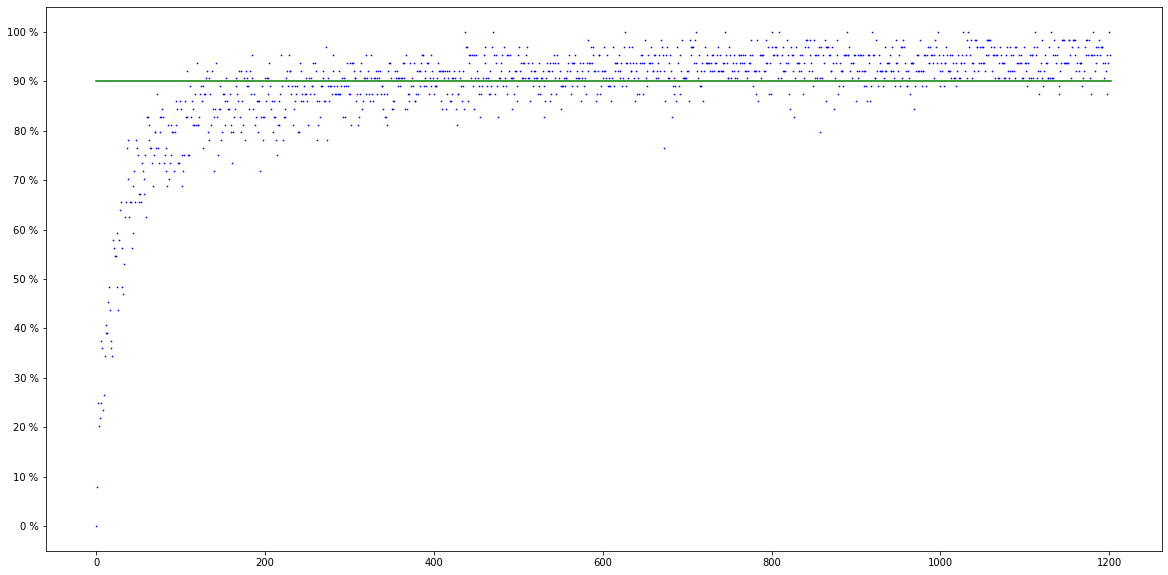

In [28]:
plt.scatter(list(range(epochs+1)), accuracies1, s=0.5, color="blue")#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.000001)
plt.plot([0,1202],[90,90], color="green")
plt.show()

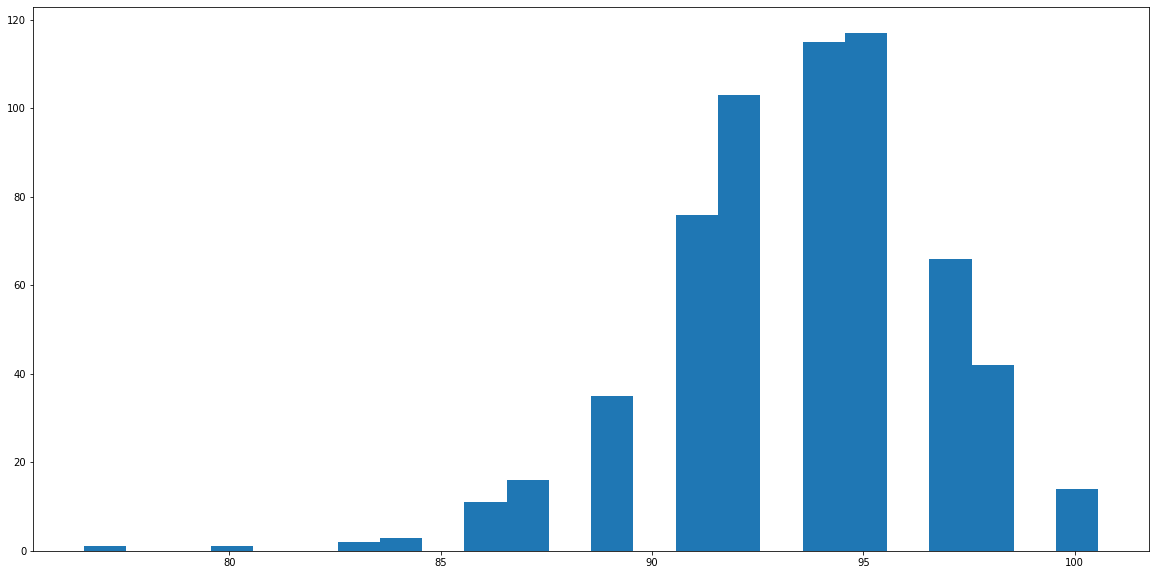

In [29]:
accuracies1_late = np.array(accuracies1[600:])
plt.hist(accuracies1_late, bins=np.arange(accuracies1_late.min(), accuracies1_late.max()+1))
plt.show()

In [30]:
print(f"moyenne: {accuracies1_late.mean(): .2f}%    | std:{accuracies1_late.std(): .2f}%")

moyenne:  93.49%    | std: 3.26%


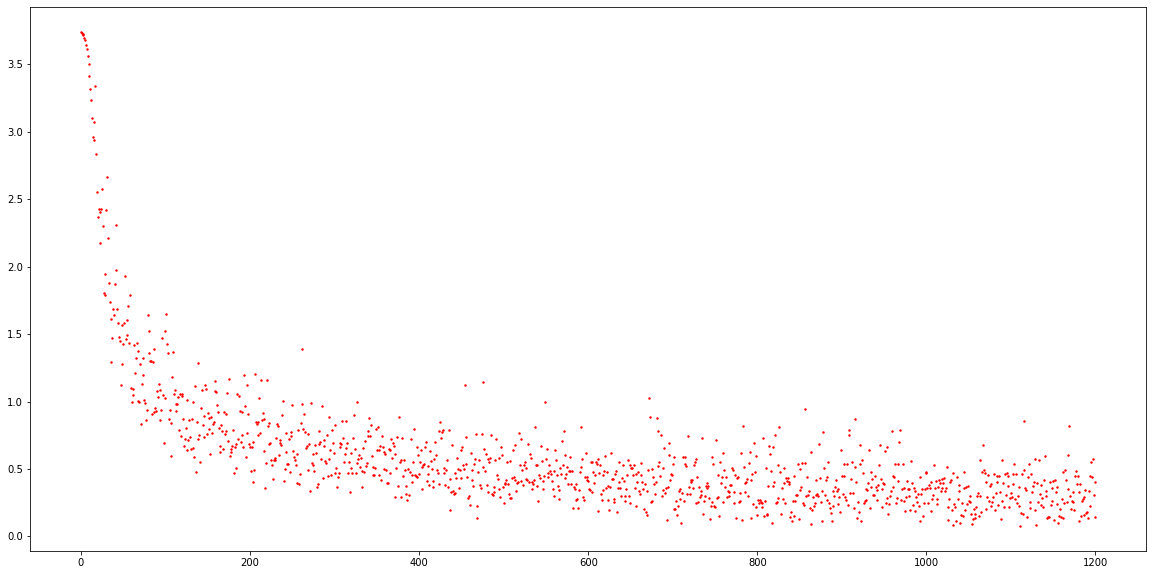

In [31]:
plt.scatter(list(range(epochs)), costs1, color="red", s=2)
plt.show()

In [32]:
#del nn, layers

**Hyperparametres**

<img src="./docs/illustrations/meme6.gif"/>

<img src="./docs/illustrations/meme11.jpg" width=500/>

### 5.2 Entrainement sur mini-batch, Test sur tout le data-set

In [33]:
SCE2 = SoftmaxCrossEntropyLoss()
layers2 = [DenseActivatedLayer(112, 784, ReLu), OutputLayer(16, 112, SCE2)]
nn2 = NeuralNetwork(layers2)

In [34]:
%%time
accuracies2, costs2 = train_on_subset(nn2, "./EMNIST_DATA_SET/", epochs=epochs, 
                                      batch_size=64, equilibrium=True, lr=1, 
                                      test_on_all=True, iter_test=20)

Iteration:    0 | Accuracy: 15.9140625 %
Iteration:   20 | Accuracy: 48.75 %
Iteration:   40 | Accuracy: 71.38020833333333 %
Iteration:   60 | Accuracy: 75.78645833333333 %
Iteration:   80 | Accuracy: 79.86979166666667 %
Iteration:  100 | Accuracy: 84.19270833333333 %
Iteration:  120 | Accuracy: 85.1953125 %
Iteration:  140 | Accuracy: 81.81510416666667 %
Iteration:  160 | Accuracy: 82.41666666666667 %
Iteration:  180 | Accuracy: 86.4375 %
Iteration:  200 | Accuracy: 87.93229166666667 %
Iteration:  220 | Accuracy: 85.9140625 %
Iteration:  240 | Accuracy: 88.5859375 %
Iteration:  260 | Accuracy: 87.8828125 %
Iteration:  280 | Accuracy: 85.875 %
Iteration:  300 | Accuracy: 89.41145833333333 %
Iteration:  320 | Accuracy: 89.31510416666667 %
Iteration:  340 | Accuracy: 89.91927083333333 %
Iteration:  360 | Accuracy: 90.76041666666667 %
Iteration:  380 | Accuracy: 91.49479166666667 %
Iteration:  400 | Accuracy: 90.53385416666667 %
Iteration:  420 | Accuracy: 92.125 %
Iteration:  440 | Accur

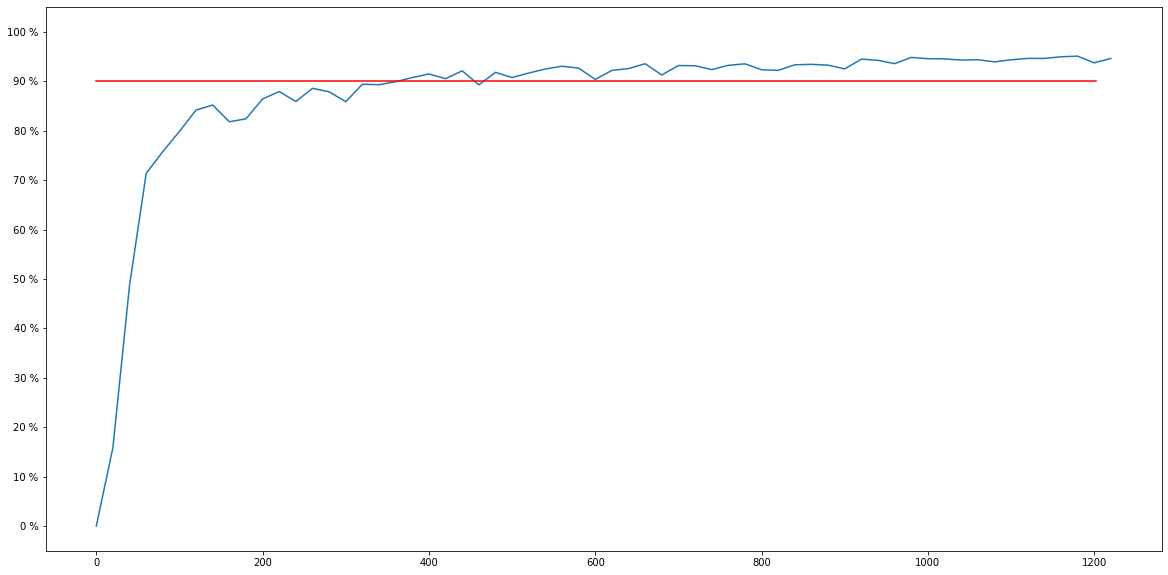

In [35]:
#print(len(range(0,epochs,20)))
plt.plot(list(range(0, epochs+20, 20)), accuracies2)#s=1
yticks = [str(i)+" %" for i in range(0,101,10)]
plt.yticks(list(range(0,101,10)), yticks)
plt.scatter([0],[100], s=0.000001)
plt.plot([0,epochs+1],[90,90], color="red")
plt.show()

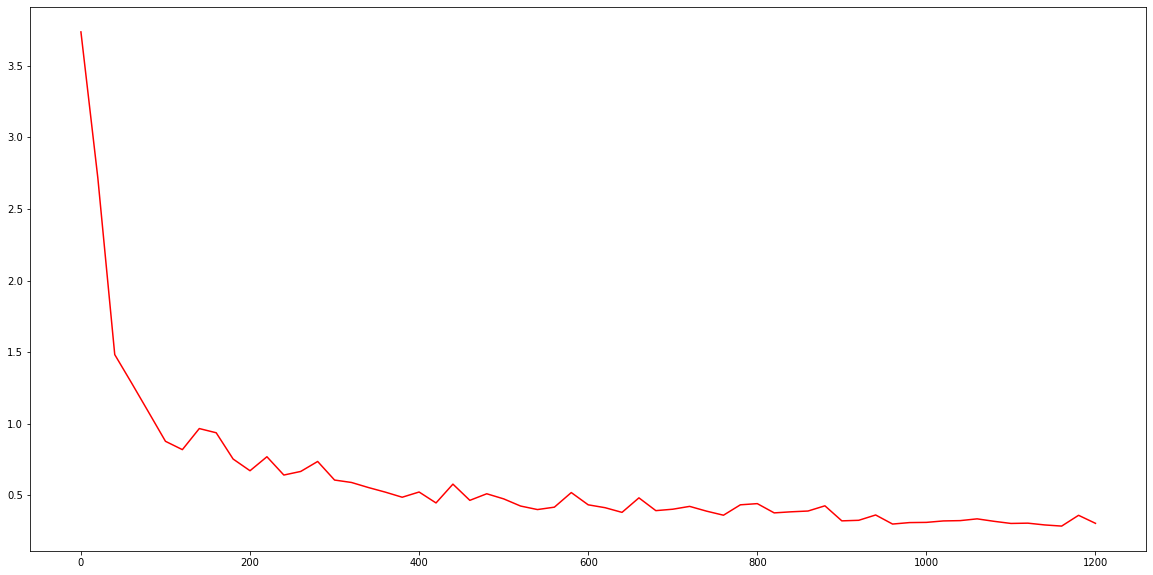

In [36]:
plt.plot(list(range(0,epochs, 20)), costs2, color="red")#, s=4
plt.show()

### 6. Exemple concret

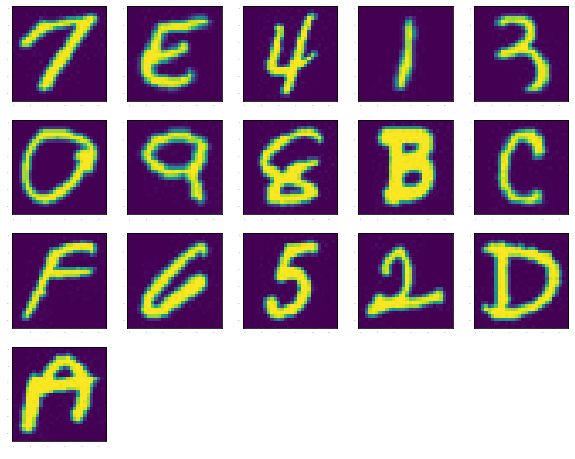

In [37]:
batch = make_random_batch("./EMNIST_DATA_SET/", 16, CLASSES, equilibrium=True)
imgs = [load_pil_image(f) for f in batch]
l = image_grid(imgs, titles=[" "]*len(batch))
l

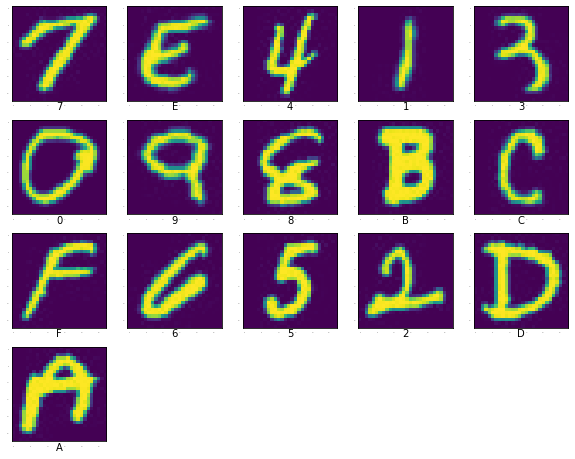

In [38]:
res = []
for i in range(len(batch)): 
    x, im = load_prediction_image(batch[i])
    p = nn2.forward(x)
    res.append(predicted_labels(p)[0])
#print(res)
image_grid(imgs, titles=res)

sauvegarde du models

In [39]:
import pickle


## 7. Applications

68 74 74 70 73 3A 2F 2F 79 6F 75 74 75 2E 62 65 2F 64 51 77 34 77 39 57 67 58 63 51 3F 74 3D 34 32

https://youtu.be/dQw4w9WgXcQ?t=42

In [40]:
from src.LoadData import *
from src.Functions import *
from src.Layers import *
from src.NeuralNetwork import *
from src.Trainer import *
from src.Utilities import *

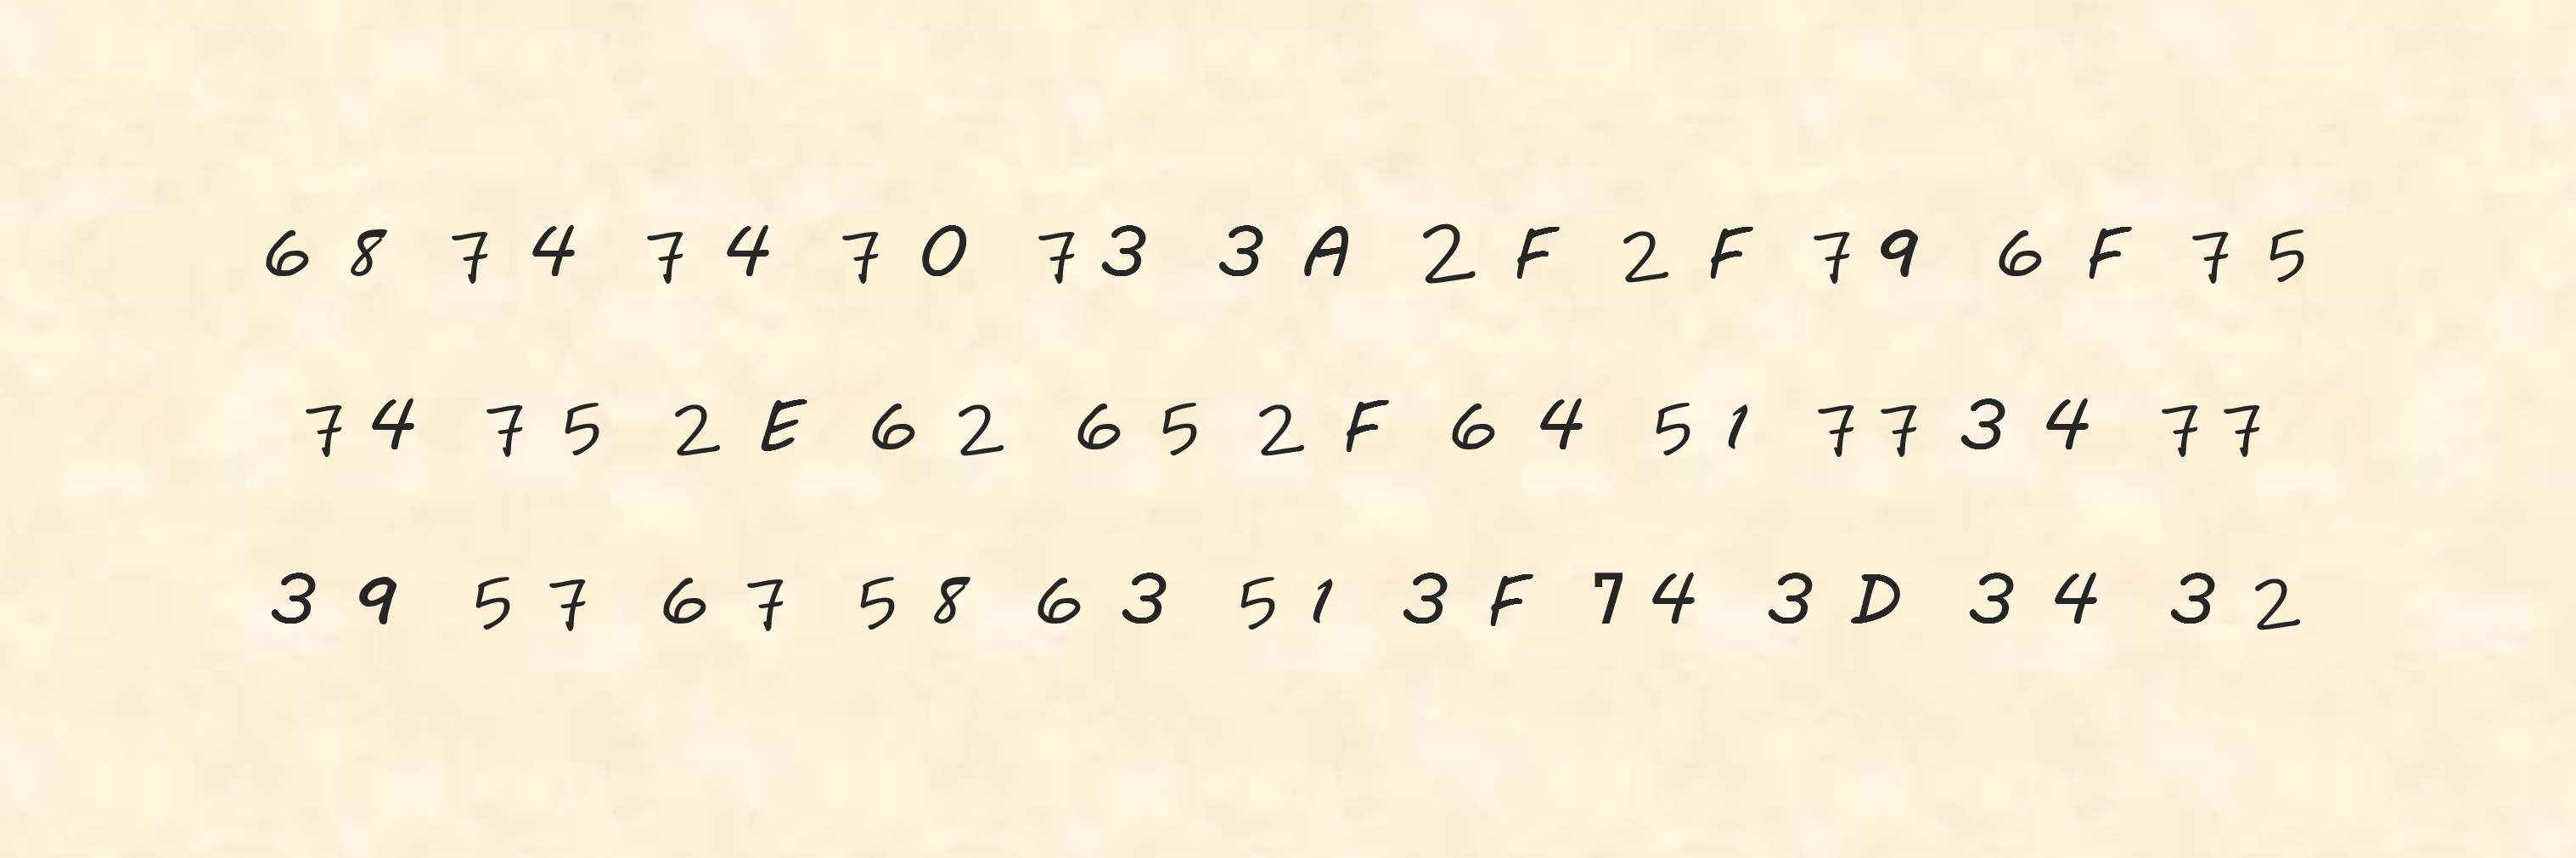

In [41]:
scan = Image.open("./docs/scan.png")
#affichage (ne modifie pas l'image)
scan

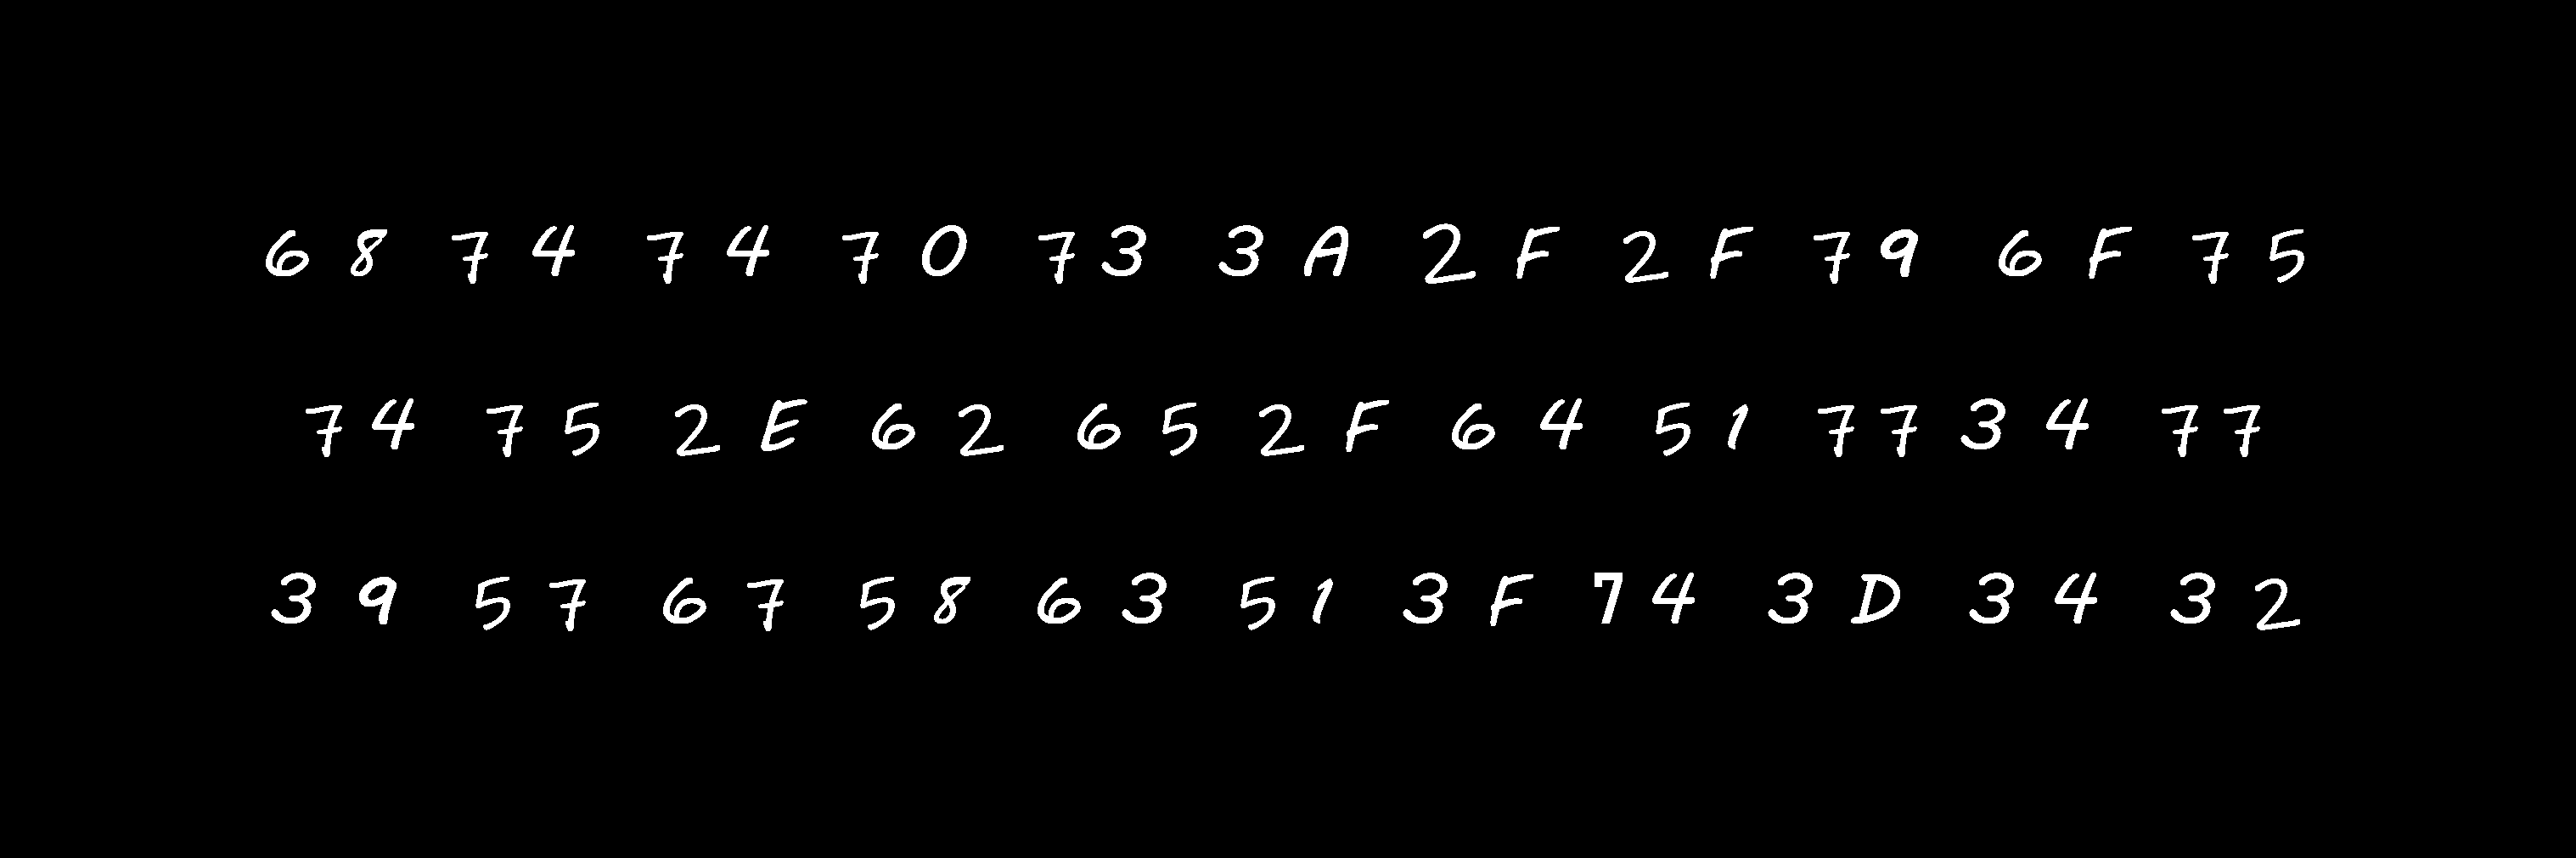

In [42]:
threshold = 230
image_file = thresh_image(scan, threshold=threshold)
# ne modifie pas l'image
image_file

In [43]:
lines = get_lines(image_file, min_line_height=10)
print(f"There are {len(lines)} lines in this image")

There are 3 lines in this image


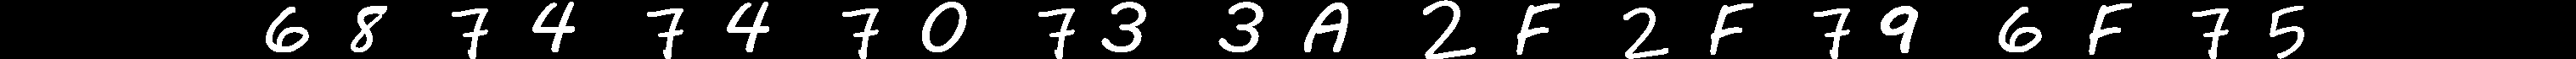

In [44]:
lines[0]

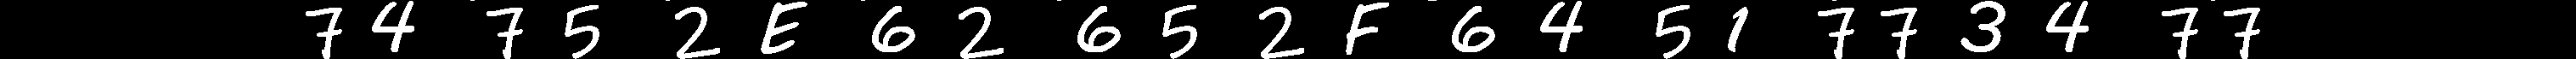

In [45]:
lines[1]

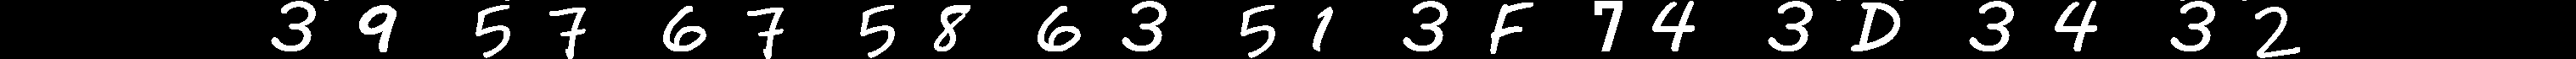

In [46]:
lines[2]

In [47]:
letters1 = get_letters(lines[0], min_letter_height=1)
print(f"There are {len(letters1)} letters in line 1")

There are 22 letters in line 1


In [48]:
letters2 = get_letters(lines[1], min_letter_height=10)
print(f"There are {len(letters2)} letters in line 2")

There are 22 letters in line 2


In [49]:
letters3 = get_letters(lines[2], min_letter_height=5)
print(f"There are {len(letters3)} letters in line 3")

There are 22 letters in line 3


In [50]:
#exemple du contenu des listes
letters = letters1 + letters2 + letters3
len(letters)

66

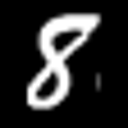

In [51]:
data_ready_letters = resize_images(letters)#default: 28x28
data_ready_letters[-15].resize((128,128))

In [52]:
data_ready_letters = [flatten_img(np.array(img)) for img in data_ready_letters]


In [53]:
data_ready_letters = make_input_matrix(data_ready_letters)


In [54]:
data_ready_letters.shape

(784, 66)

In [55]:
#data_ready_letters = data_ready_letters1 + data_ready_letters2
#m = make_input_matrix(flatten_img(np.array(data_ready_letters1[0])))
l = predicted_labels(nn.forward(data_ready_letters))

['6', '8', '7', '4', '7', '4', '7', '0', '7', '3', '3', 'A', '2', 'F', '2', 'F', '7', '9', '6', 'F', '7', '5']


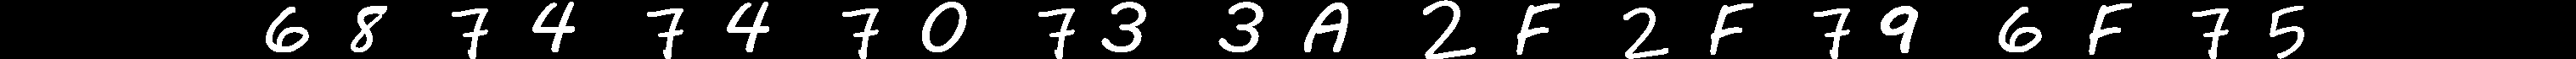

In [56]:
print(l[:22])
lines[0]

['7', '4', '7', '5', '2', 'E', '6', '2', '6', '5', '2', 'F', '6', '4', '5', '1', '7', '7', '3', '4', '7', '7']


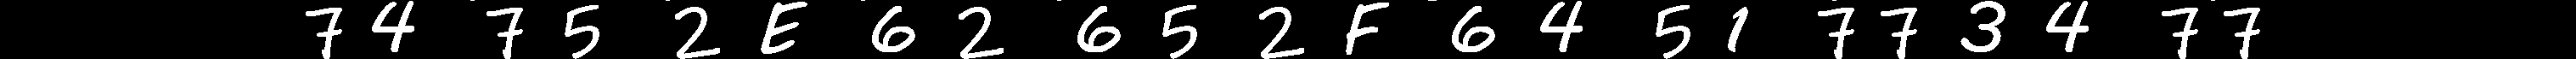

In [57]:
print(l[22:44])
lines[1]

['3', '9', '5', '7', '6', '7', '5', '8', '6', '3', '5', '8', '3', 'F', '7', '4', '3', 'D', '3', '4', '3', '2']


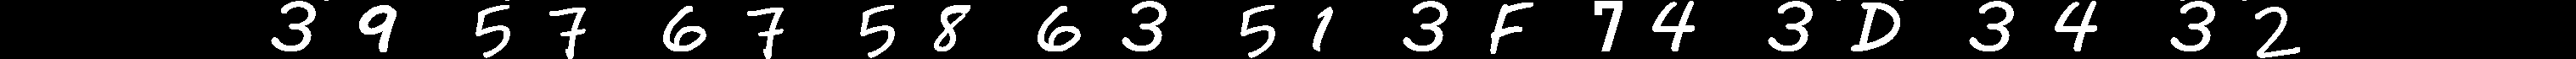

In [58]:
print(l[44:])
lines[2]

In [59]:
bits = ["".join(l[i:i+2]) for i in range(0, len(l)-1, 2)]
print(bits)

['68', '74', '74', '70', '73', '3A', '2F', '2F', '79', '6F', '75', '74', '75', '2E', '62', '65', '2F', '64', '51', '77', '34', '77', '39', '57', '67', '58', '63', '58', '3F', '74', '3D', '34', '32']


In [60]:
print(type(bits[0]))
l = [bytes.fromhex(bits[i]).decode('utf-8') for i in range(len(bits))]
"".join(l)

<class 'str'>


'https://youtu.be/dQw4w9WgXcX?t=42'

## 8. Ouverture et extensions possibles

Utile mais pas encore note